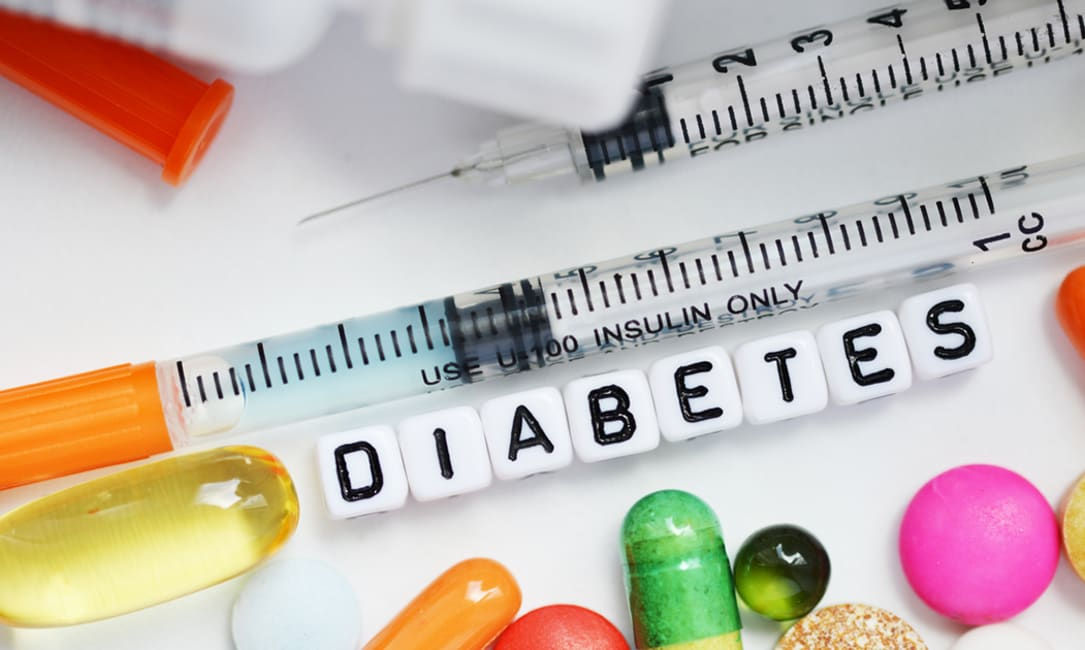

# **What is Diabetes**

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough or any insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

# **DataSet Description:**

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
import altair as alt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# **Reading and Understanding Data**

In [2]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

print("The rows and columns of data are", data.shape, "respectively.")

The rows and columns of data are (768, 9) respectively.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



**Observation**
* All variable are either float or integer

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observations:**
* The average number of Pregnancies are 4.
* Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which seems like an error and should be explore later. 
* Pregnancies, SkinThickness, Insulin and Age have major difference between 3rd quartile and maximum value. This represent the chances of outliers in the data. 


In [5]:
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

# **Exploring Missing Values & Cleaning The Data**

In [6]:
# valueable information for data cleaning

for col in data.columns:
    print("{} minimum value is {}".format(col, data[col].min()))
    print("{} maximum value is {}".format(col, data[col].max()))
    print("{} mean value is {}".format(col, data[col].mean()))
    print(" ")

Pregnancies minimum value is 0
Pregnancies maximum value is 17
Pregnancies mean value is 3.8450520833333335
 
Glucose minimum value is 0
Glucose maximum value is 199
Glucose mean value is 120.89453125
 
BloodPressure minimum value is 0
BloodPressure maximum value is 122
BloodPressure mean value is 69.10546875
 
SkinThickness minimum value is 0
SkinThickness maximum value is 99
SkinThickness mean value is 20.536458333333332
 
Insulin minimum value is 0
Insulin maximum value is 846
Insulin mean value is 79.79947916666667
 
BMI minimum value is 0.0
BMI maximum value is 67.1
BMI mean value is 31.992578124999998
 
DiabetesPedigreeFunction minimum value is 0.078
DiabetesPedigreeFunction maximum value is 2.42
DiabetesPedigreeFunction mean value is 0.47187630208333325
 
Age minimum value is 21
Age maximum value is 81
Age mean value is 33.240885416666664
 
Outcome minimum value is 0
Outcome maximum value is 1
Outcome mean value is 0.3489583333333333
 


In [7]:
'''The above code shows that we have some 0 values in our data.
# Column like Glucose, BloodPressure, Skinthikness and Insulin must not have 0 values in it.
# Later we will change the values to 0 to mean and medians '''

# First we calculate the percentage of zeros in our data

for col in data.columns[0:8]:
    print("The missing percentage of {} is {} ".format(col, data[data[col] == 0][col].count() /data[col].count()* 100))

The missing percentage of Pregnancies is 14.453125 
The missing percentage of Glucose is 0.6510416666666667 
The missing percentage of BloodPressure is 4.557291666666666 
The missing percentage of SkinThickness is 29.557291666666668 
The missing percentage of Insulin is 48.69791666666667 
The missing percentage of BMI is 1.4322916666666665 
The missing percentage of DiabetesPedigreeFunction is 0.0 
The missing percentage of Age is 0.0 


In [8]:
# Replace 0 value with null data

data[["Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]] = data[["Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]].replace(0, np.nan)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Insulin                     48.697917
SkinThickness               29.557292
BloodPressure                4.557292
BMI                          1.432292
Glucose                      0.651042
Pregnancies                  0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

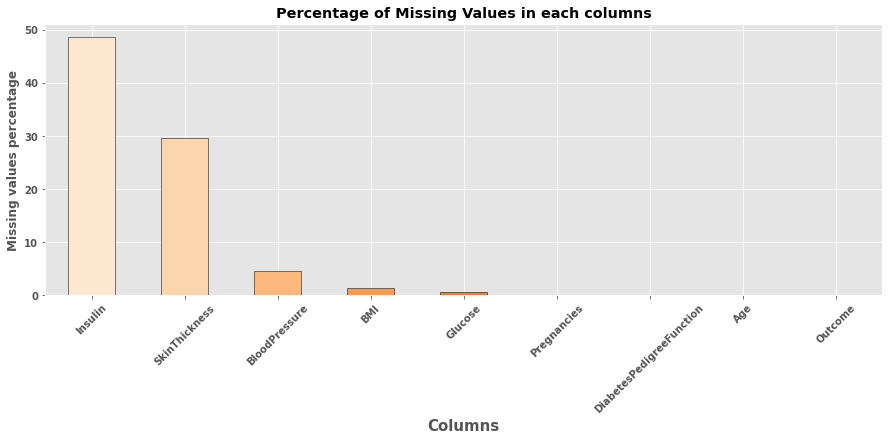

In [9]:
# plotting the percentage of missing values on graph

plt.figure(figsize = (15, 5))
percentage = (data.isnull().mean()) * 100
percentage.sort_values(ascending = False).plot.bar(color = sns.color_palette("Oranges", 8), edgecolor= "black")
print(percentage.sort_values(ascending=False))
plt.xticks(rotation=45, weight = "bold")
plt.title("Percentage of Missing Values in each columns", weight= "bold")
plt.xlabel('Columns', size=15, weight="bold")
plt.ylabel('Missing values percentage', weight = "bold")
plt.yticks(weight ="bold")
plt.show

**Observations:**

* Here we can note that 48% of insulin data has null values followed by 29% null values of Skin Thinkness. 
* We will fix this later according to skewness of data.

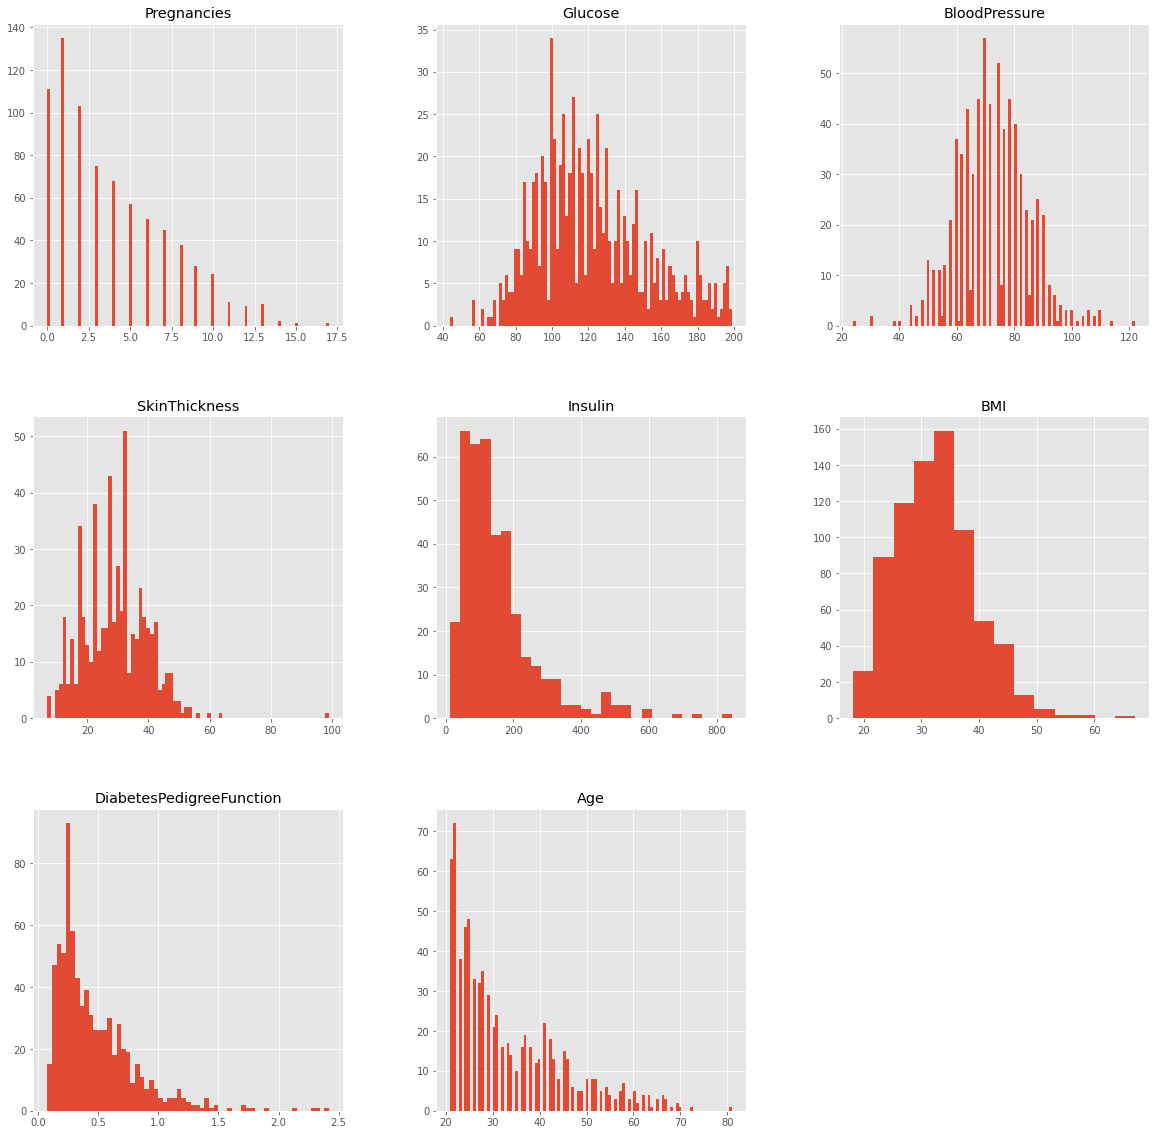

In [10]:
# Distribution Curve


columns = data.drop('Outcome', axis = 1).columns
data[columns].hist(figsize= (20, 20), bins = "stone")

plt.show()

In [11]:
# check the skewness of the curve

from scipy.stats import skew
columns = data.drop("Outcome", axis = 1).columns
for col in columns:
    print(" Skewness of the {} column is {}".format(col, data[col].skew()))

 Skewness of the Pregnancies column is 0.9016739791518588
 Skewness of the Glucose column is 0.5309885349396285
 Skewness of the BloodPressure column is 0.13415273171959252
 Skewness of the SkinThickness column is 0.690619013984192
 Skewness of the Insulin column is 2.166463843812443
 Skewness of the BMI column is 0.5939697505712673
 Skewness of the DiabetesPedigreeFunction column is 1.919911066307204
 Skewness of the Age column is 1.1295967011444805


In [12]:
#Replacing nill values of Glucose, BloodPressure, SkinThinkness and BMI columns with mean values

col=['Glucose' ,'BloodPressure' ,'SkinThickness' ,'BMI']
for i in col:
    data[i].replace(np.nan,data[i].mean(),inplace=True)

# Replacing nill values of Insulin with Median due to its high skewness

data["Insulin"].replace(np.nan,data["Insulin"].median(),inplace=True)


print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **Exploratory Data Analysis**

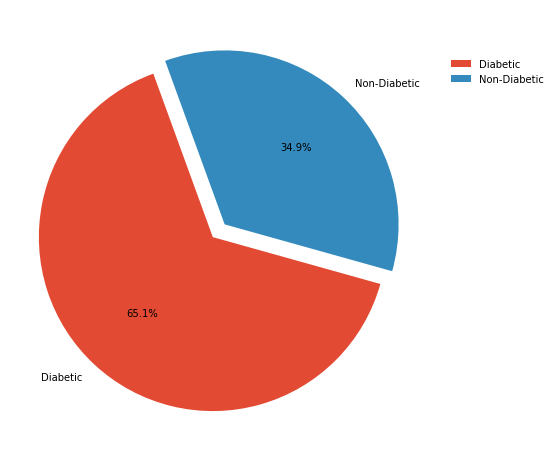

In [13]:
# Representation of Diabetic and Non-Diabetic People in our Data

outcome_val = data["Outcome"].value_counts()
total = data["Outcome"].value_counts().sum()

fig, ax = plt.subplots(figsize=(12,8))
label = ['Diabetic',
        'Non-Diabetic']
percentages = [outcome_val[0]/total, outcome_val[1]/total]
explode = (0.1, 0)
ax.pie(outcome_val, autopct="%.1f%%", labels = label, explode = explode, startangle=110)
ax.legend(frameon=False, bbox_to_anchor=(1,0.9))
plt.show()

Outcome                            0           1
DiabetesPedigreeFunction    0.429734    0.550500
Pregnancies                 3.298000    4.865672
SkinThickness              27.768651   31.736944
BMI                        30.888434   35.384757
Age                        31.190000   37.067164
BloodPressure              70.935397   75.147324
Glucose                   110.710121  142.165573
Insulin                   127.792000  164.701493


<AxesSubplot:>

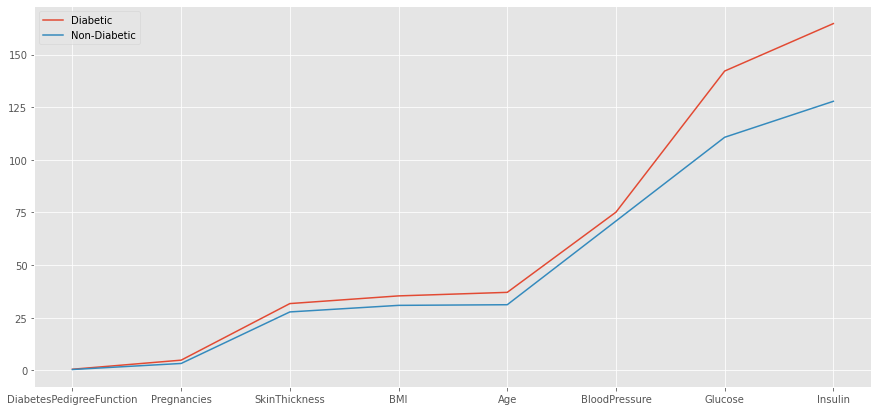

In [14]:
# mean values of every column based on Diabetes and NonDiabetes
# blue line represent the mean values of all features of Diabetic People
# Red line represent the mean values of all features of Non-Diabetic People

avg_data_according_to_disease = data.groupby('Outcome').mean().T.sort_values(by = 1)
print(avg_data_according_to_disease)

label = ['Non-Diabetic',
        'Diabetic']

plt.figure(figsize = (15,7))
sns.lineplot(x = avg_data_according_to_disease[1].index, y = avg_data_according_to_disease[1].values, label = label[1])
sns.lineplot(x = avg_data_according_to_disease[0].index, y = avg_data_according_to_disease[0].values, label = label[0])


# Observations :

* In the above graph, it is clear that the Diabetic patients have elevated values of almost all the features. However, the above graph is not on the same scale so we cant conclude the result. 

* Next section will conclude the result according to percentage.


                       col1       col2
5             BloodPressure   5.937695
2             SkinThickness  14.290551
3                       BMI  14.556655
4                       Age  18.843104
0  DiabetesPedigreeFunction  28.102501
6                   Glucose  28.412445
7                   Insulin  28.882475
1               Pregnancies  47.534010


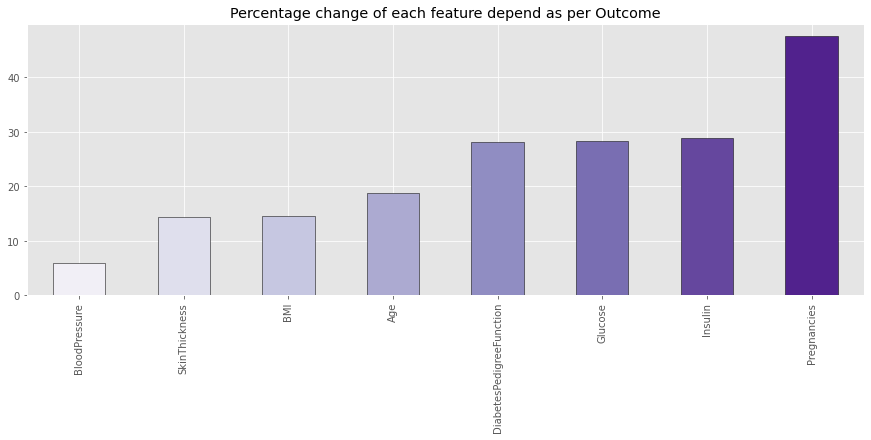

In [15]:
avg_data_according_to_disease = data.groupby('Outcome').mean().T.sort_values(by = 1)

non_diab = avg_data_according_to_disease[0]
diab =  avg_data_according_to_disease[1]
perc = []

for item in range(0,8):
    percentage_change = ((diab[item] - non_diab[item])/non_diab[item] * 100)
    perc.append(percentage_change)

d = {'col1': ["DiabetesPedigreeFunction", "Pregnancies", "SkinThickness", "BMI", "Age", "BloodPressure", "Glucose", "Insulin"], 
     'col2': [perc[0], perc[1],perc[2],perc[3],perc[4],perc[5],perc[6],perc[7]]}
df = pd.DataFrame(data=d)
df.sort_values(by = "col2", inplace = True)
print(df)

plt.figure(figsize = (15,5))
df.col2.plot.bar(color = sns.color_palette("Purples", 8), edgecolor= "black")
plt.xticks([0,1,2,3,4,5,6,7], df.col1, rotation="vertical") 
plt.title("Percentage change of each feature depend as per Outcome")
plt.show()


# Observations

* There is a hgher chances of Diabetes in women with high number of pregnancies.
* Higher levels of insulin is found in women having diabetes.
* Higher plasma glucose concentration is seen in Women with diabetes.
* Women with diabetes have higher BMI.
* Diabetic women have higher diabetes pedigree function value suggesting family history matters.
* Age does play an important role,Diabetes is more prominent in middle age to older aged women.



<AxesSubplot:>

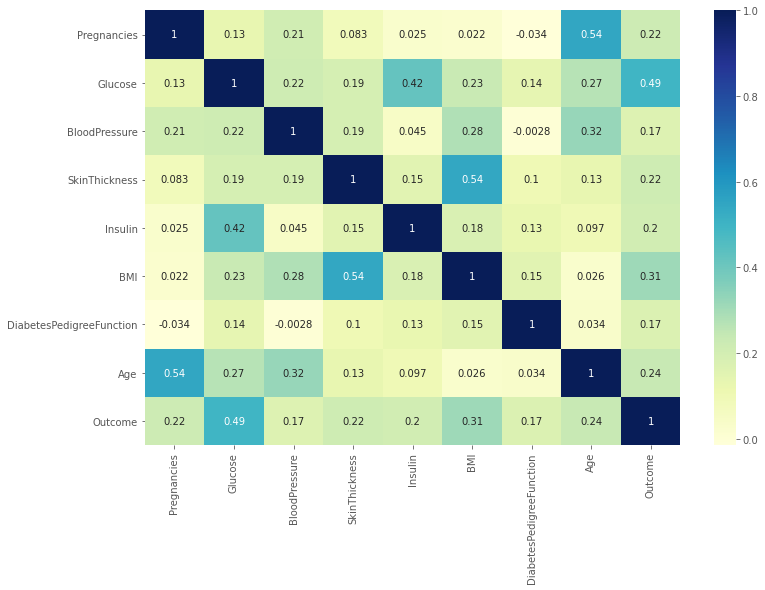

In [16]:
#Heatmap correlation of Data

plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', robust=True)


**Observations:**

* Heatmap shows a moderate correlation between 'Diabetes" and "Glucose" 
* There is a positive correlation between age and number of pregnancies which makes sense.
* BMI and skin thickness also shows a moderate positive correlation.

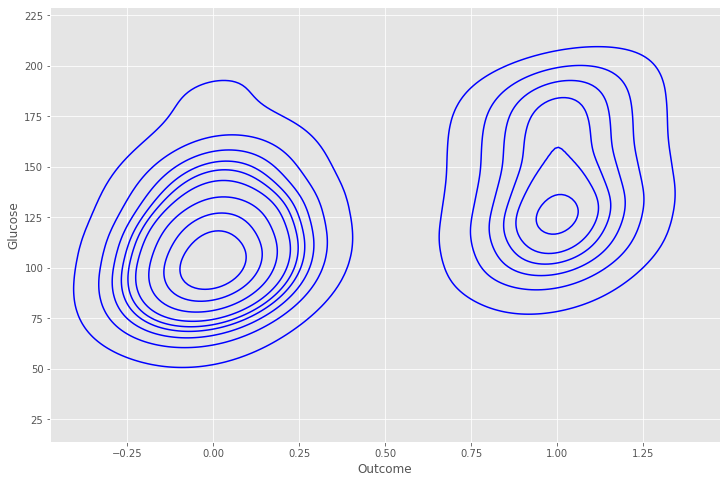

In [17]:
plt.figure(figsize= (12,8))
sns.kdeplot(x='Outcome', y= 'Glucose', data=data, color="blue")
plt.show()


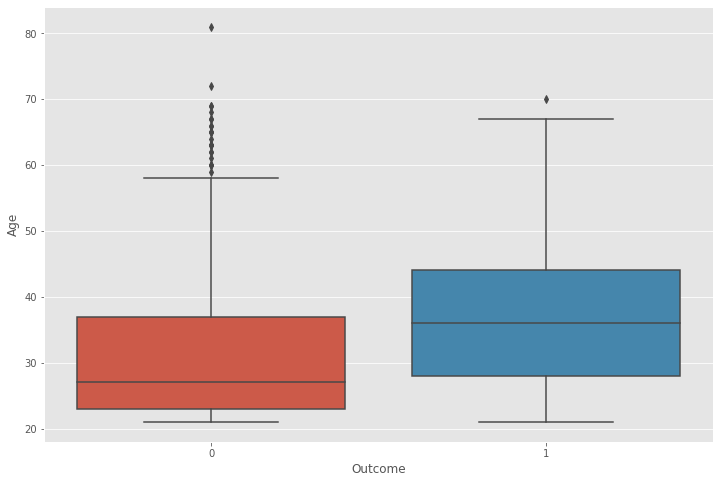

In [18]:
plt.figure(figsize= (12,8))
sns.boxplot(x="Outcome", y= "Age", data=data)
plt.show()

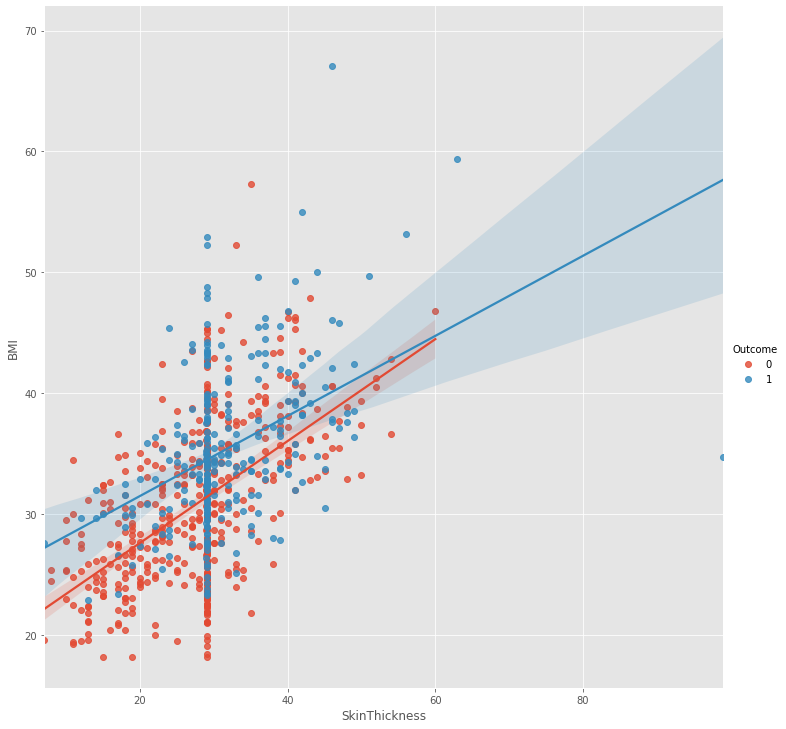

In [19]:

sns.lmplot(x='SkinThickness', y= 'BMI', hue='Outcome', data=data, size = 10)
plt.show()